In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [137]:
data = pd.read_csv('/content/diabetes.csv')

In [138]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
data.shape

(768, 9)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


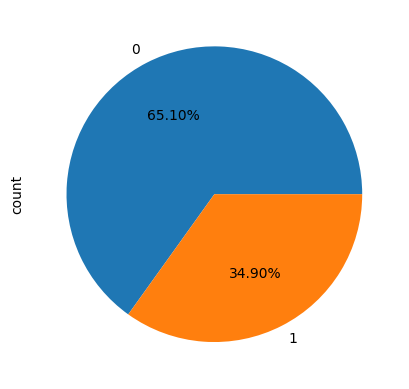

In [141]:
#lets see percentage of how many people have diabetese
data['Outcome'].value_counts().plot(kind = 'pie',autopct = '%0.2f%%')
plt.show()

#### 1 - yes diabetes
#### 0 - no diabetes

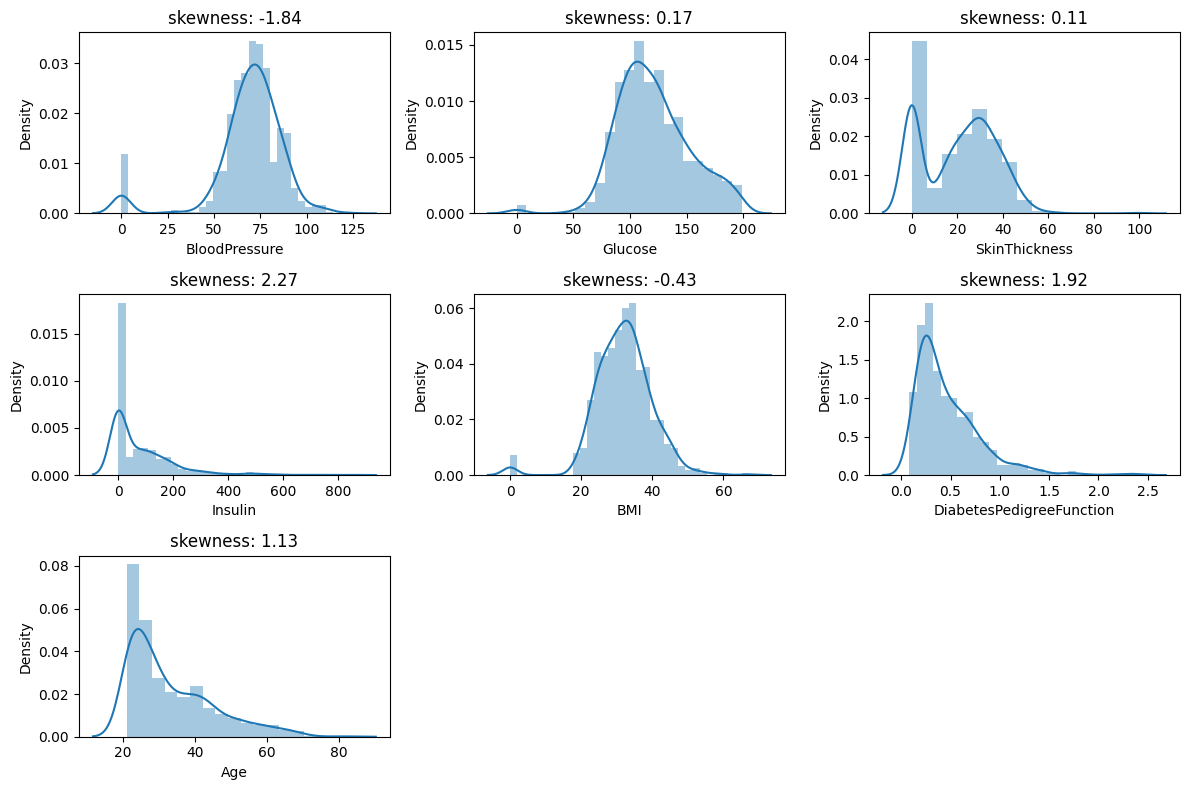

In [142]:
#lets see distribution of other numerical continuous columns
col = ['BloodPressure','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
t = 1
plt.figure(figsize = (12,8))
for i in col:
    plt.subplot(3,3,t)
    sns.distplot(data[i])
    plt.title(f'skewness: {round(data[i].skew(),2)}')
    t += 1
plt.tight_layout()
plt.show()

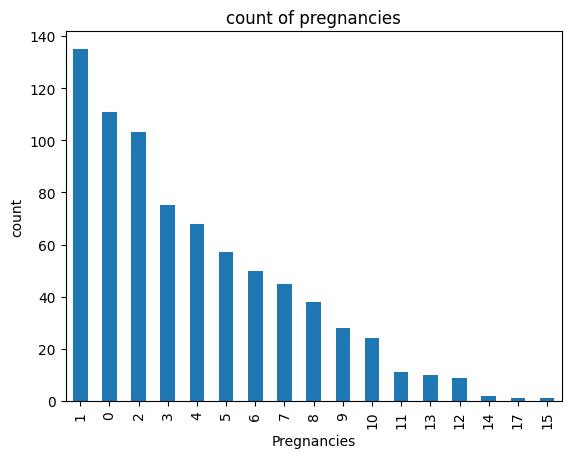

In [143]:
#lets visualize discrete columns in our dataset which is pregnancies
data['Pregnancies'].value_counts().plot(kind = 'bar')
plt.title('count of pregnancies')
plt.ylabel('count')
plt.show()

### Bivariate analysis

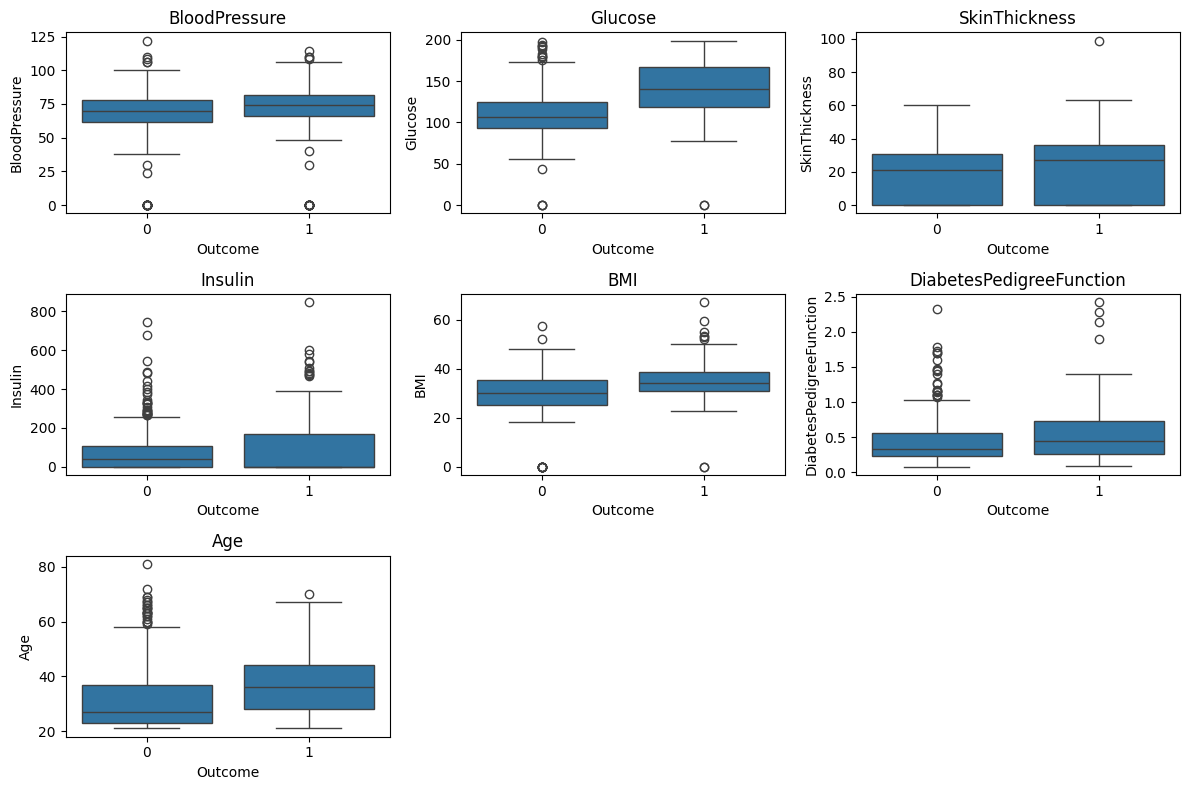

In [144]:
col = ['BloodPressure','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
t = 1
plt.figure(figsize = (12,8))
for i in col:
    plt.subplot(3,3,t)
    sns.boxplot(y = data[i], x = data['Outcome'])
    plt.title(i)
    t += 1
plt.tight_layout()
plt.show()

1. Based on the boxplots, most features show a noticeable difference between diabetic and non-diabetic groups. Diabetic individuals tend to have higher Glucose, BMI, Insulin, and Age values.
2. The spread and median of these distributions are clearly shifted upward for the diabetic class, indicating that as these variables increase, the likelihood of diabetes also increases.
3. Features like SkinThickness and DiabetesPedigreeFunction also contribute but with relatively smaller differences. Overall, this visual analysis supports the clinical understanding that higher glucose levels, body mass index, and age are strong predictors of diabetes.

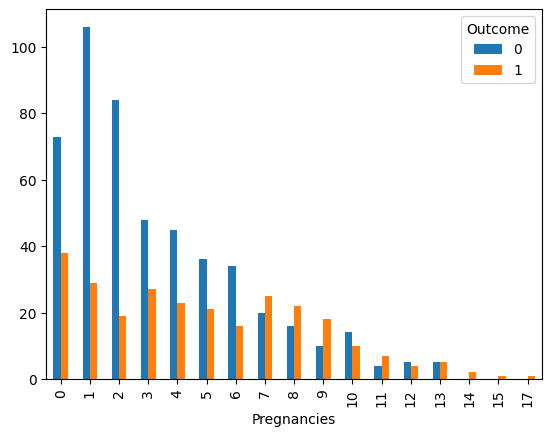

In [145]:
#lets see if there is any effect of pregnancies column on Outcome
pd.crosstab(data['Pregnancies'],data['Outcome']).plot(kind = 'bar')
plt.show()

#### Inferences
The crosstab between Pregnancies and Outcome indicates that women with a higher number of pregnancies have a greater likelihood of developing diabetes.
While non-diabetic cases are more frequent among those with fewer pregnancies (0–3), the proportion of diabetic cases increases noticeably for individuals with 6 or more pregnancies.
This pattern suggests a positive correlation between the number of pregnancies and the probability of diabetes.

### missing value treatment

In [146]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


No missing values found in our dataset

### neural network training on our dataset

In [147]:
#lets split our data
x = data.drop('Outcome',axis = 1)
y = data['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [148]:
#lets scale our data since neural network loves standard data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [149]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.pipeline import Pipeline


Build your neural network function

In [150]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [151]:
x_train.shape[1]

8

In [152]:
#compilling our data
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [153]:
history = model.fit(
    x_train_s,           # features used to train
    y_train,           # correct output labels
    epochs=50,         # number of passes through entire training data
    batch_size=16,     # how many samples per update step
    validation_split=0.2,  # hold out 20% of training data for validation
    verbose=1          # show progress bar
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4930 - loss: 0.7772 - val_accuracy: 0.5610 - val_loss: 0.7249
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6122 - loss: 0.6998 - val_accuracy: 0.6341 - val_loss: 0.6783
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6481 - loss: 0.6468 - val_accuracy: 0.6911 - val_loss: 0.6391
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7019 - loss: 0.6056 - val_accuracy: 0.7073 - val_loss: 0.6074
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6955 - loss: 0.5818 - val_accuracy: 0.6911 - val_loss: 0.5828
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7265 - loss: 0.5511 - val_accuracy: 0.6911 - val_loss: 0.5619
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7619 - loss: 0.5369 - val_accuracy: 0.6992 - val_loss: 0.5430
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7558 - loss: 0.5326 - val_accuracy: 0.7236 - val_loss

### Evaluate the Model

In [154]:
loss, accuracy = model.evaluate(x_test_s, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7619 - loss: 0.5201 
Test Accuracy: 0.77


### Visualize the Training History

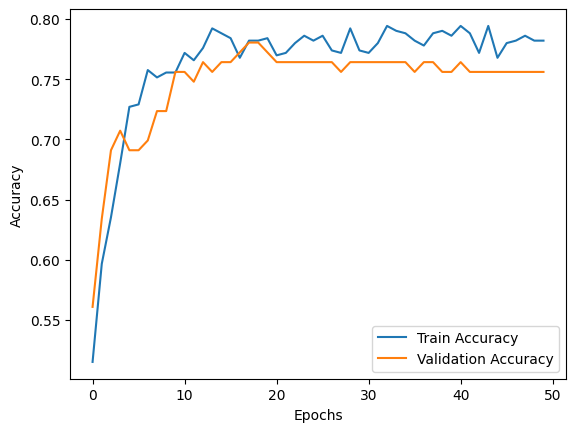

In [155]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [156]:
### Make Predictions
y_pred = model.predict(x_test_s)
y_pred = (y_pred > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [157]:
from sklearn.metrics import classification_report

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Model deployment


In [159]:
def model_ann():
  model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model


In [160]:
!pip install scikeras

In [161]:
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

In [162]:
ann = KerasClassifier(model_ann, epochs = 50, batch_size = 16, verbose = 0)

In [163]:
pipline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', ann)
])

In [164]:
pipline.fit(x_train,y_train)
train_accuracy = pipline.score(x_train,y_train)
print(f"Train Accuracy: {train_accuracy:.2f}")
test_accuracy = pipline.score(x_test,y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.79
Test Accuracy: 0.77


In [165]:
#!pip install -U scikeras scikit-learn

In [166]:
import pickle

In [167]:
pickle.dump(pipline,open('diabetes_pipelines.pkl','wb'))

In [168]:
from google.colab import files
files.download('diabetes_pipelines.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>